# Homework 3

## IRIS Data

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We start by reading the data.

In [5]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv')

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We creat two scatter plots with sepal length/width and petal length/width per species.

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

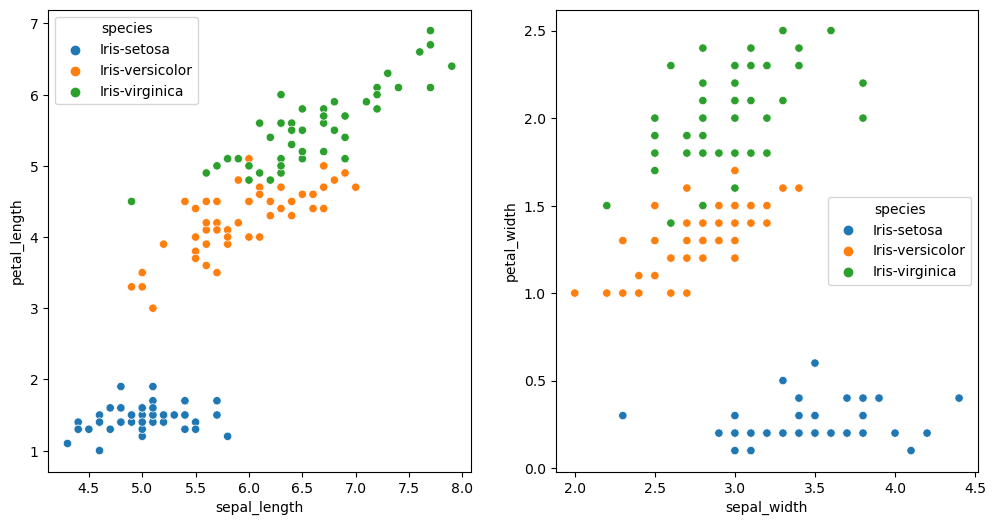

In [27]:
fig, ax =plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x = iris_df['sepal_length'], y= iris_df['petal_length'], hue= iris_df['species'], ax =ax[0])
sns.scatterplot(x = iris_df['sepal_width'], y= iris_df['petal_width'], hue= iris_df['species'], ax=ax[1])


From the figure we can see that it seem to be some corrlation between sepal length (width) and petal length (width) for the species Iris-setosa and Iris-versicolor. For the Iris-virginica it does not seems to be a corralation. 

<AxesSubplot:xlabel='species', ylabel='petal_length'>

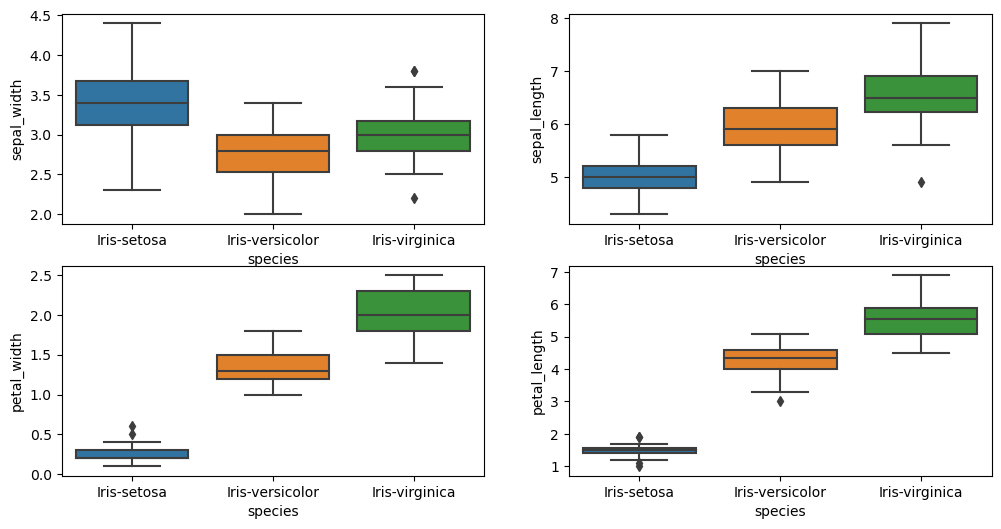

In [31]:
fig, ax =plt.subplots(2,2, figsize=(12, 6))
sns.boxplot( data = iris_df, x = 'species' , y= 'sepal_width', ax =ax[0,0])
sns.boxplot( data = iris_df, x = 'species' , y= 'sepal_length', ax =ax[0,1])
sns.boxplot( data = iris_df, x = 'species' , y= 'petal_width', ax =ax[1,0])
sns.boxplot( data = iris_df, x = 'species' , y= 'petal_length', ax =ax[1,1])

From the above figure we can see that the spread of the petal width and petal lenght for the Iris-setosa is smaller then the other species. We can also see that non of the species seem to have any outliers.

Now, we creat a matrix plot.

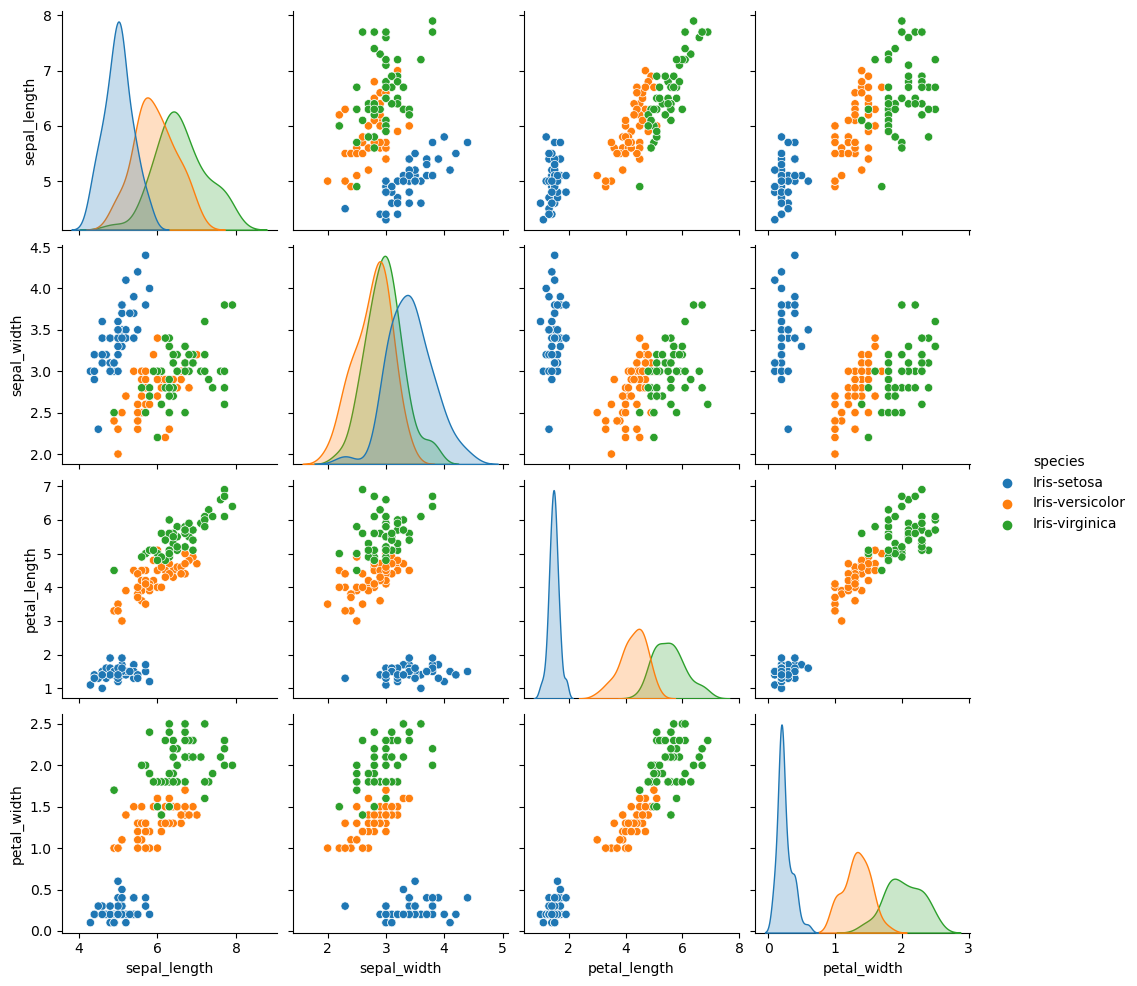

In [33]:
sns.pairplot(iris_df, hue ='species')

From the above figure we see that for all three species sepal length and sepal width seem too be corralated. And the same for petal width and petal length, which is not surpricing.

## Birdwatching

In [35]:
art_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv')

In [36]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      21916 non-null  int64 
 1   Taxonsorteringsordning  21916 non-null  int64 
 2   Rödlistade              4777 non-null   object
 3   Artnamn                 21916 non-null  object
 4   Vetenskapligt namn      21916 non-null  object
 5   Auktor                  21843 non-null  object
 6   Antal                   21916 non-null  object
 7   Ålder/stadium           757 non-null    object
 8   Kön                     2023 non-null   object
 9   Aktivitet               16745 non-null  object
 10  Lokalnamn               21916 non-null  object
 11  Ostkoordinat            21916 non-null  int64 
 12  Nordkoordinat           21916 non-null  int64 
 13  Noggrannhet             21916 non-null  int64 
 14  Diffusion               21916 non-null  int64 
 15  Lä

In [217]:
art_df.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1.0,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2.0,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


We know that in the column Antal there is some notes "Noterad" and "Ej återfunnen". Because we don't know how many of the bird was observed in that moment we remove those observations. We also make the column into float.

In [215]:
cleaned_art_df = art_df.copy()
cleaned_art_df['Antal'] = cleaned_art_df['Antal'].replace(['noterad', 'Ej återfunnen'], np.nan)\
                            .astype(float)
cleaned_art_df = cleaned_art_df.dropna(subset = ['Antal'])

cleaned_art_df

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1.0,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2.0,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21911,101504074,55451,NaN,Steglits,Carduelis carduelis,"(Linnaeus, 1758)",5.0,NaN,NaN,spel/sång,...,Uppland,Stockholm,2022-06-08,06:00,2022-06-08,07:15,NaN,NaN,Ossian Rydebjörk,Ossian Rydebjörk
21912,101505927,55093,NT,Grönsångare,Phylloscopus sibilatrix,"(Bechstein, 1793)",4.0,NaN,NaN,spel/sång,...,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,NaN,NaN,Joakim Ekman,Joakim Ekman
21913,101505939,55094,NaN,Lövsångare,Phylloscopus trochilus,"(Linnaeus, 1758)",1.0,NaN,NaN,spel/sång,...,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,NaN,NaN,Joakim Ekman,Joakim Ekman
21914,101506008,55094,NaN,Lövsångare,Phylloscopus trochilus,"(Linnaeus, 1758)",2.0,NaN,i par,föda åt ungar,...,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,Med mat i näbben.,NaN,Joakim Ekman,Joakim Ekman


We take oute the top 3.

In [218]:
top_3 = cleaned_art_df[['Artnamn', 'Antal']]\
        .groupby(['Artnamn'])\
        .sum()\
        .sort_values('Antal', ascending = False)\
        .head(3)
top_3

,Antal
Artnamn,
Grönsiska,20211.0
Sothöna,8308.0
Gräsand,7167.0


From the table above we can read that the top three most prevelant species are Grönsiska, Sothöna and Gräsand.

Now we filter the data frame and only keep those in top 3.

In [242]:
filtered_art_df = cleaned_art_df[cleaned_art_df['Artnamn'].isin(top_3.index)]

filtered_art_df

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
7,97788369,54006,NaN,Gräsand,Anas platyrhynchos,"Linnaeus, 1758",5.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:47,2022-01-01,08:47,NaN,NaN,jesper sollerman,jesper sollerman
12,97788374,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:48,2022-01-01,08:48,NaN,NaN,jesper sollerman,jesper sollerman
34,97788399,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",30.0,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,08:49,2022-01-01,09:17,NaN,NaN,jesper sollerman,jesper sollerman
49,97798946,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,födosökande,...,Uppland,Stockholm,2022-01-01,14:04,2022-01-01,14:04,NaN,NaN,Kjell Ljungberg,Kjell Ljungberg
89,97802402,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",100.0,NaN,NaN,NaN,...,Uppland,Stockholm,2022-01-01,14:02,2022-01-01,14:08,100-150,NaN,Kerstin Nordenadler,Kerstin Nordenadler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,101483999,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",2.0,NaN,i par,födosökande,...,Uppland,Solna,2022-06-06,NaN,2022-06-06,NaN,NaN,NaN,Helena Hallgren,Helena Hallgren
21757,101484016,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",2.0,1K,NaN,födosökande,...,Uppland,Solna,2022-06-06,NaN,2022-06-06,NaN,NaN,NaN,Helena Hallgren,Helena Hallgren
21779,101489666,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",10.0,NaN,NaN,permanent revir,...,Uppland,Solna,2022-06-07,06:30,2022-06-07,09:00,NaN,NaN,Karin Oknemark,Karin Oknemark
21829,101494036,54222,NaN,Sothöna,Fulica atra,"Linnaeus, 1758",1.0,NaN,NaN,ruvande,...,Uppland,Solna,2022-06-07,07:30,2022-06-07,09:30,NaN,NaN,Ari Määttä,Ari Määttä


We make a copy of the data frame and extract the months from the datum.

In [243]:
filtered_art_df_copy = filterd_df.copy()
filtered_art_df_copy['Month'] = pd.to_datetime(filtered_art_df_copy['Startdatum']).dt.month

We now gruop by art and month and then plot month aginst amount för each bird.

In [244]:
grouped_top3= filtered_art_df_copy[['Artnamn', 'Antal', 'Month']]\
                .groupby(['Artnamn', 'Month'])\
                .sum()\
                .reset_index()

<AxesSubplot:xlabel='Month', ylabel='Antal'>

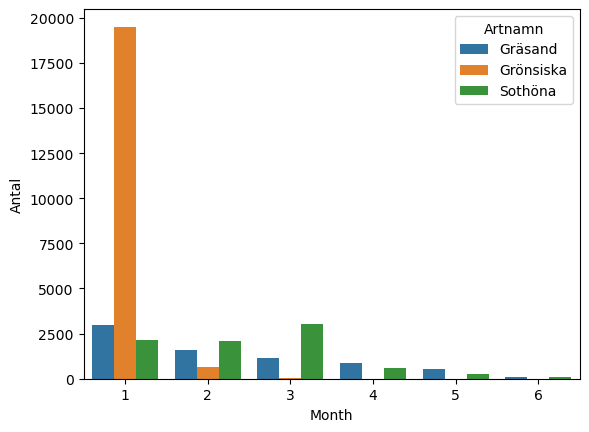

In [245]:
sns.barplot(y='Antal', x = 'Month', hue = 'Artnamn', data = grouped_top3)

From the plot above we can see that each bird is only observed in the first half of the year and that they decrese after January, except for Sothöna that has its peak in Mars and then decreses.

In [246]:
rare = cleaned_art_df[['Artnamn', 'Antal']]\
        .groupby(['Artnamn'])\
        .sum()\
        .sort_values('Antal')

bottom_3.loc[rare['Antal']==1]

,Antal
Artnamn,
Strömstare,1.0
Trädlärka,1.0
Tornfalk,1.0
Rödbena,1.0
Varfågel,1.0
Gravand,1.0
Forsärla,1.0
Fjällvråk,1.0
Spillkråka,1.0


Now we want to know which municipality have observed most birds?

In [258]:
grouped_art_df = art_df[['Kommun', 'Antal']]\
                .groupby('Kommun')\
                .sum()\
                .sort_values('Antal', ascending= False)
grouped_art_df

,Antal
Kommun,
Stockholm,92561.0
Solna,15361.0
Sollentuna,6434.0
Lidingö,1439.0


From the above table we can see that Stockholm have most observed birds.

We now want to answere the question who have reported most birds?

In [263]:
top5_resports = cleaned_art_df[['Rapportör', 'Antal']]\
            .groupby('Rapportör')\
            .sum()\
            .sort_values('Antal', ascending = False)\
            .head()
top5_resports

,Antal
Rapportör,
Svante Söderholm,50079.0
Folke K Larsson,6875.0
Johan Nilsson,4276.0
Per Gullberg,3824.0
Ari Määttä,3149.0


So, Svante Söderholm have reported most birds. 

What are birds doing?

In [268]:
activity = art_df[['Artnamn', 'Aktivitet', 'Antal']]\
            .groupby('Aktivitet')\
            .sum()\
            .sort_values('Antal', ascending = False)\
            .head()

activity

,Antal
Aktivitet,
rastande,51917.0
födosökande,10794.0
förbiflygande,7986.0
spel/sång,7617.0
"obs i häcktid, lämplig biotop",5194.0


From the above table we can see that most observed birds are doing the activity "rastande".

## Predicting Strokes

In [302]:
strokes_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')

We start by getting an overview of the columns and dtat type of the data.

In [271]:
strokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From this output we can see that the columns have different data type. And that BMI is the only columns that have cells with value Nan. However, the other columns can have missing data but it is noted in a different way. We will explore this later by doing histograms.

To get an quick overview of the data we can look at the first five rows of the data. 

In [305]:
strokes_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


From the table above we can guess that hypertension, hear disease and stroke is binary. To check if this is correct we can do a histogram.

From the table below we can see that age seems to be widly spread with mean 43 years old.

In [272]:
strokes_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


To get an overview of the distribution of some of the variables we do histograms, this also gives us insight the data in balanced or not.

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

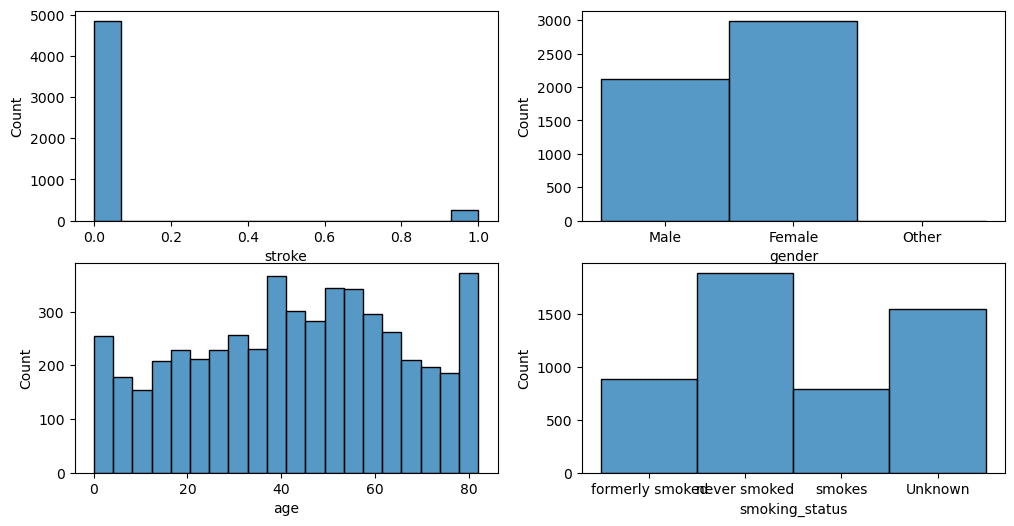

In [290]:
fig, ax =plt.subplots(2,2, figsize=(12, 6))
sns.histplot(strokes_df['stroke'], ax= ax[0,0])
sns.histplot(strokes_df['gender'], ax= ax[0,1])
sns.histplot(strokes_df['age'], ax= ax[1,0])
sns.histplot(strokes_df['smoking_status'], ax = ax[1,1])

From the plots above we can see that strokes are very unbalanced but that gender, age and smoking status seems to be fairly balanced. However, we can see that is is relativly many were the smoking status is unknown (which we did not see in the first overview). We can also see that our previusly guess that strokes is binary seems to be true. 

To see if there is some corralation between age, bmi and average glucose level we do pairplots.

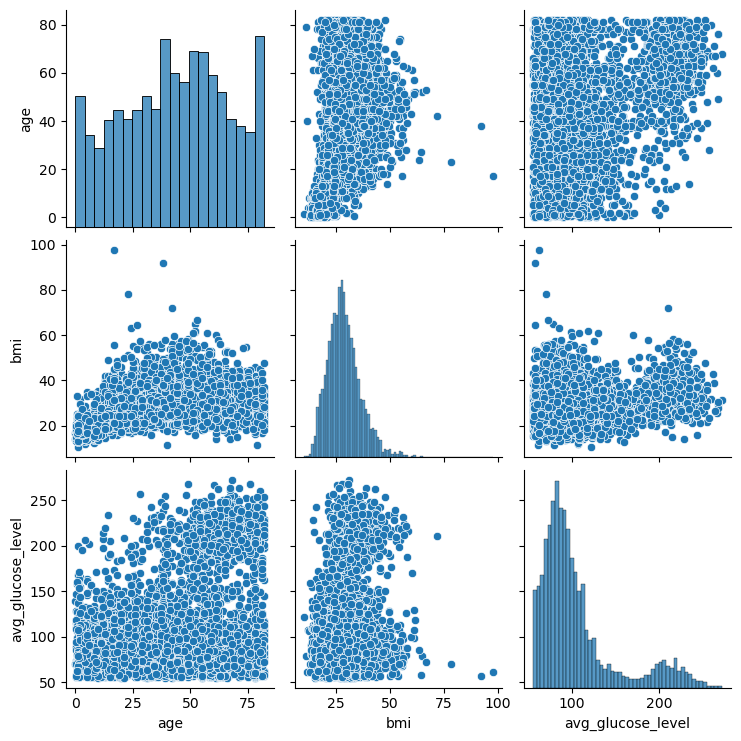

In [300]:
selected_features = ['age', 'bmi','avg_glucose_level']
sns.pairplot(strokes_df[selected_features])
plt.show()

From the above figure we can see that is dose not seems to be a corralation between age, bmi and average glucos level.

Three questions that give you insight is:
1. Does age have an inmact on strokes occurence?
2. Is BMI a risk factor for having a stroke?
3. Those people with higer glucose level have greater risk of having a stroke?

## Cleaning data

In [441]:
cell_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv')

We start by getting an overview of the data type.

In [411]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

In [442]:
cell_df.head()

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k


I choose to forward fill, first we have to make sure that if a row start with Nan it sets it to 0 instead. We set it to 0 because most countries have the value zero in the year 1960.

In [471]:
cleaned_cell_df = cell_df.copy()

for cell in range(len(cleaned_cell_df)):
    if np.isnan(cleaned_cell_df.loc[cell,'1960']):
        cleaned_cell_df.loc[cell,'1960'] = 0.0
    else: 
        continue

cleaned_cell_df = cleaned_cell_df.fillna(method='ffill', axis= 1)

Now we change k, M and B to e^3, e^6 and e^9 respectivly and change the type to float.

In [472]:
cleaned_cell_df.iloc[:,1:] = cleaned_cell_df.iloc[:,1:]\
    .replace({'k' :'e3', 'M' : 'e6', 'B': 'e9'}, regex = True)\

numeric_cell_df = cleaned_cell_df.iloc[:,1:].astype(float)

cleaned_cell_df = pd.concat([cleaned_cell_df.iloc[:, 0:1], numeric_cell_df], axis=1)

Below we creat the table mantiond in the assignment.

In [473]:
cleaned_cell_df[['iso-3','2015','2016', '2017', '2018', '2019']].sort_values('2015', ascending=False).head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
